In [1]:
!pip install Tensorflow 

In [2]:
# data path https://data.caltech.edu/records/mzrjq-6wc02 

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 











C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) 

In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\LENOVO\OneDrive\Documents\caltech-101\caltech-101\101_ObjectCategories\CNN_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')  

Found 800 images belonging to 1 classes.


In [7]:
test_set = test_datagen.flow_from_directory(r'C:\Users\LENOVO\OneDrive\Documents\caltech-101\caltech-101\101_ObjectCategories\CNN_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary') 

Found 42 images belonging to 1 classes.


In [22]:
history =classifier.fit(training_set,
                         steps_per_epoch = 80,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 80) 

Epoch 1/10
25/80 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 1.0000 - loss: 2.6576e-16

C:\Users\LENOVO\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 1.0000 - loss: 3.2511e-16 - val_accuracy: 1.0000 - val_loss: 1.2967e-10
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 1.0000 - loss: 9.9273e-15 - val_accuracy: 1.0000 - val_loss: 1.2701e-10
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 1.0000 - loss: 2.1385e-16 - val_accuracy: 1.0000 - val_loss: 1.2679e-10
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 1.0000 - loss: 5.3488e-16 - val_accuracy: 1.0000 - val_loss: 1.2678e-10
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 2.4439e-15 - val_accuracy: 1.0000 - val_loss: 1.2678e-10
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 1.0000 - loss: 3.1274e-16 - val_accuracy: 1.0000 - val_loss: 1.2678e-10
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 7.0341e-16 - val_accuracy: 1.0000 - val_loss: 1.2678e-10
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0

In [9]:
import matplotlib.pyplot as plt
import pandas as pd 

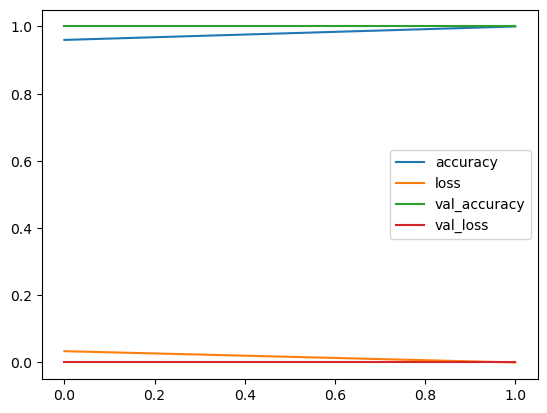

In [10]:
metrics_df =pd.DataFrame(history.history)
metrics_df.plot()
plt.show() 